Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64
count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64


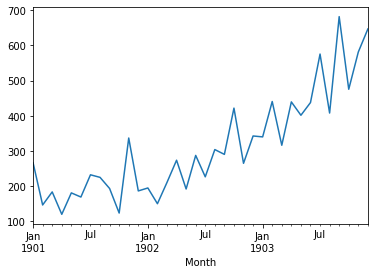

In [28]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from matplotlib import pyplot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
print(series.describe())
series.plot()
pyplot.show()

In [26]:
# Step 1: Define the Supervised Learning Problem
# Create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

     t-1    t+1
0    NaN  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3


In [36]:
# Step 2: Train and Test Sets
X = dataframe.values
train_size = int(len(X)*0.66)
train,test = X[1:train_size],X[train_size:]
train_X,train_y = train[:,0],train[:,1]
test_X, test_y = test[:,0], test[:,1]


23
[[266.  145.9]
 [145.9 183.1]
 [183.1 119.3]
 [119.3 180.3]
 [180.3 168.5]
 [168.5 231.8]
 [231.8 224.5]
 [224.5 192.8]
 [192.8 122.9]
 [122.9 336.5]
 [336.5 185.9]
 [185.9 194.3]
 [194.3 149.5]
 [149.5 210.1]
 [210.1 273.3]
 [273.3 191.4]
 [191.4 287. ]
 [287.  226. ]
 [226.  303.6]
 [303.6 289.9]
 [289.9 421.6]
 [421.6 264.5]] [[264.5 342.3]
 [342.3 339.7]
 [339.7 440.4]
 [440.4 315.9]
 [315.9 439.3]
 [439.3 401.3]
 [401.3 437.4]
 [437.4 575.5]
 [575.5 407.6]
 [407.6 682. ]
 [682.  475.3]
 [475.3 581.3]
 [581.3 646.9]]
train_X_Y:  [266.  145.9 183.1 119.3 180.3 168.5 231.8 224.5 192.8 122.9 336.5 185.9
 194.3 149.5 210.1 273.3 191.4 287.  226.  303.6 289.9 421.6] [145.9 183.1 119.3 180.3 168.5 231.8 224.5 192.8 122.9 336.5 185.9 194.3
 149.5 210.1 273.3 191.4 287.  226.  303.6 289.9 421.6 264.5]


In [45]:
# Step 3: Persistence Algorithm
# persistence model
def model_persistence(x):
	return x

[264.5 342.3 339.7 440.4 315.9 439.3 401.3 437.4 575.5 407.6 682.  475.3
 581.3]


In [50]:
# Step 4: Make and Evaluate Forecast
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
print(predictions)
print(test_y)
print('Test MSE: %.3f' % test_score)

[264.5, 342.3, 339.7, 440.4, 315.9, 439.3, 401.3, 437.4, 575.5, 407.6, 682.0, 475.3, 581.3]
[342.3 339.7 440.4 315.9 439.3 401.3 437.4 575.5 407.6 682.  475.3 581.3
 646.9]
Test MSE: 17730.518


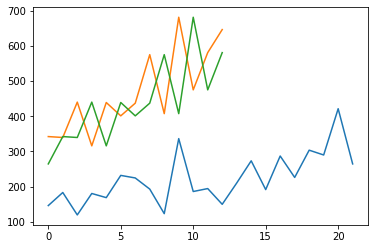

In [51]:
# Step 5: Complete Example
# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()